<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema

**Entrada**: Secuencia de n números $[a_1,a_2,a_3,...,a_n]$.

**Salida**: Permutación ordenada de la secuencia inicial: $[a_1',a_2',a_3',...,a_n']$, pero con los valores ordenados tal que $a_1'<=a_2'<=a_3'<=...<=a_n'$.

Anteriormente hemos visto como el problema del ordenamiento ha sido abordado de forma iterativa. Es decir, una lista o arreglo de elementos era ordenado mientras se repetía un segmento de código dentro del algoritmo. Sin embargo, aunque este sí da resultados, es posible observar como, a medida que el número de elementos aumenta, el tiempo que se tarda en realizar esta acción es mayor.

Pero existe un refrán que se convirtió en un famoso tipo de algoritmo dentro de la informática. **"Divide y vencerás"**. Tal como indica, se comenzó a pensar que era mucho mejor dividir nuestro problema en varios subproblemas similares, pero más pequeños, los cuales se solucionan uno por uno, para luego unirlos y obtener una respuesta al original.

![image](https://ortizvivas.com/wp-content/uploads/dividir-500x250.jpg)

#2. Merge Sort

Este algoritmo de ordenamiento fue desarrollado por John Von Neumann en 1945. Es de naturaleza recursiva, es decir, que se llama a sí mismo durante su ejecución.

##2.1 Código

A continuación, el siguiente código muestra una implementación de este.

In [2]:
#Creación de variables globales
comparisons = 0
recursiveCalls = 0
originalSize = 0

def merge(array, left, right, verbose = False):
  if verbose == True:
    print("\nComienza el merge")
  aux = [] #Arreglo auxiliar
  leftPos = 0 #Variable para recorrer arreglo izquierdo
  rightPos = 0 #Variable para recorrer arreglo derecho
  global comparisons #Se llama a la variable global "comparisons"

  #Bucle que se detiene cuando un arreglo se termina de recorrer
  while(leftPos < len(left) and rightPos < len(right)):
    if (left[leftPos] < right[rightPos]): #Se copia un valor del arreglo izquierdo
      aux.append(left[leftPos])
      if (verbose == True):
        print("\nDato ",leftPos, "del subarreglo izquierdo es menor:",)
        print(aux)
      leftPos+=1
      comparisons+=1
    else: #Se copia un valor del arreglo derecho
      aux.append(right[rightPos])
      if (verbose == True):
        print("\nDato",rightPos, "del subarreglo derecho es menor")
        print(aux)
      rightPos+=1
      comparisons+=1
  
  #Se agregan los números restantes del arreglo izquierdo
  while (leftPos < len(left)):
    aux.append(left[leftPos])
    if verbose == True: 
      print("\nDato restante del subarreglo izquierdo: ", left[leftPos])
      print(aux)
    leftPos+=1

  #Se agregan los números restantes del arreglo derecho
  while (rightPos < len(right)):
    aux.append(right[rightPos])
    if verbose == True: 
      print("Dato restante del subarreglo derecho: ", right[rightPos])
      print(aux)
    rightPos+=1

  if (verbose == True): print("\nSubarreglo ordenado en merge: ", aux)
  
  #Se copian los valores del arreglo auxiliar al original
  for i in range(len(aux)):
    array[i] = aux[i]

def merge_sort(array, verbose = False):
  global recursiveCalls #Llamada a variable global
  if recursiveCalls == 0: 
    global originalSize
    originalSize = len(array)
  
  if verbose == True and len(array) == 1:
    print("Se retorna arreglo de un elemento (",array,")")
  if (array[0] == array[-1]): return

  if verbose == True and recursiveCalls == 0:
      print("Entrada: ", array,"\n")
  if  array[0] == array[-1]: return #Si el arreglo solo tiene una posición, se retorna inmediatamente

  mid = len(array) // 2 #Se define mitad del arreglo
  leftArray = array[:mid]
  rightArray = array[mid:]
  
  if verbose == True:
    print("Subarreglo izquierdo: ", leftArray)
    print("Subarreglo derecho: ", rightArray)
  
  recursiveCalls+=1
  if (verbose == True):
    print("\nPor la izquierda, llamada recursiva n°", recursiveCalls) 
    merge_sort(leftArray, verbose = True)
  else:
    merge_sort(leftArray)
  
  recursiveCalls+=1
  if (verbose == True):
    print("\nPor la derecha, llamada recursiva n°", recursiveCalls) 
    merge_sort(rightArray, verbose = True)
  else:
    merge_sort(rightArray)
  if verbose == True:
    merge(array, leftArray, rightArray, verbose = True)
  else:
    merge(array, leftArray, rightArray)
  
  if (verbose == True and len(array) == originalSize): print("Arreglo original ordenado: ", array)

#Ejemplo
array = [4,5,2,6,3,1]
print("Input: ", array)
merge_sort(array)
print("Sorted array: ", array)
print("Comparisons made during execution: ", comparisons)
print("Recursive calls made: ", recursiveCalls)

Input:  [4, 5, 2, 6, 3, 1]
Sorted array:  [1, 2, 3, 4, 5, 6]
Comparisons made during execution:  11
Recursive calls made:  10


##2.2 Descripción del algoritmo



El algoritmo es del tipo **divide y vencerás**, y tal como fue mencionado anteriormente, es recursivo, llamandose dos veces dentro del programa. Como entrada, recibe una secuencia de $n$ números y retorna esta ordenada de menor a mayor. En general, funciona de la siguiente manera:

1. El arreglo se divide en **2** subarreglos, que contienen $n/2$ elementos cada uno.
2. Cada subarreglo es ordenada con ayuda de la recursividad.
3. Gracias a la función **merge**, estos dos subarreglos se combinan para obtener un arreglo ordenado de $n$ números.

Ahora, así funciona **Merge Sort**. Sin embargo, como se puede observar, también actúa otra llamada **merge**, la cual hace lo siguiente:

1. Teniendo ambos subarreglos, dentro de un ciclo while se va recorriendo cada uno hasta que cualquiera no tenga más elementos por recorrer.
2. Dentro del ciclo, si el elemento $a$ del subarreglo izquierdo es menor a $b$ del subarreglo derecho, el primero se copia en un arreglo auxiliar, y viceversa.
3. Si un subarreglo termino antes de tiempo, se ordenan los datos restantes del otro.
4. El arreglo auxiliar se copia al arreglo original que recibe la función.

![image](http://3.bp.blogspot.com/-vPF0WB9Qjws/Uefj78RAH7I/AAAAAAAABXM/BSBU66QVB6A/s1600/merge+sort+ejemplo.png)

Para ver con más detalle cómo funciona el algoritmo, `verbose` debe ser igual a `True`, tal como se muestra en una sección posterior.

##2.3 Ejemplo

Como muestra, usaremos el siguiente arreglo:

$x = [4,42,27,213,43,4] $

Para comenzar, este se divide en dos subarreglos: 

$p = [4,42,27]$ y $r = [213,43,4]$

Comenzamos con el de la izquierda, es decir, $p$. A este nuevamente se le aplica nuevamente mergeSort, y se subdivide en otros subarreglos que llamaremos $a = [4]$ y $d = [42,27]$. Como el primero solo tiene un elemento, este es retornado inmediatamente, mientras que el segundo se divide en 2.

Cada elemento de $d$ entra a la función **merge**. Allí, se combinan de forma ordenada.

$d = [27,42]$

Luego, el subarreglo de un dato $a$ regresa para combinarse con $d$, para formar nuevamente $p$, que como recordaremos es el subarreglo izquierdo del arreglo original. Esta vez, sin embargo, estará ordenado de menor a mayor.

$p = [4,27,42]$

Ahora, hacemos el mismo proceso, pero con el subarreglo derecho $r$.

$r = [213,43,4]$

Este arreglo se dividirá en $j = [213]$ y $l = [43,4]$.

El subarreglo $l$ también se divide en dos. Luego se combina de forma ordenada.

$l = [4,43]$

Para así combinarse $j$ y $l$ para volver a formar el subarreglo $r$, pero ahora ordenado.

$r = [4,43,213]$

Para finalizar, y luego de ordenar ambos subarreglos, ambos se combinan ordenadamente de menor a mayor para formar el arreglo original $x$.

$x = [4,4,27,42,43,213]$

En la siguiente imagen se grafica el proceso recién mencionado.

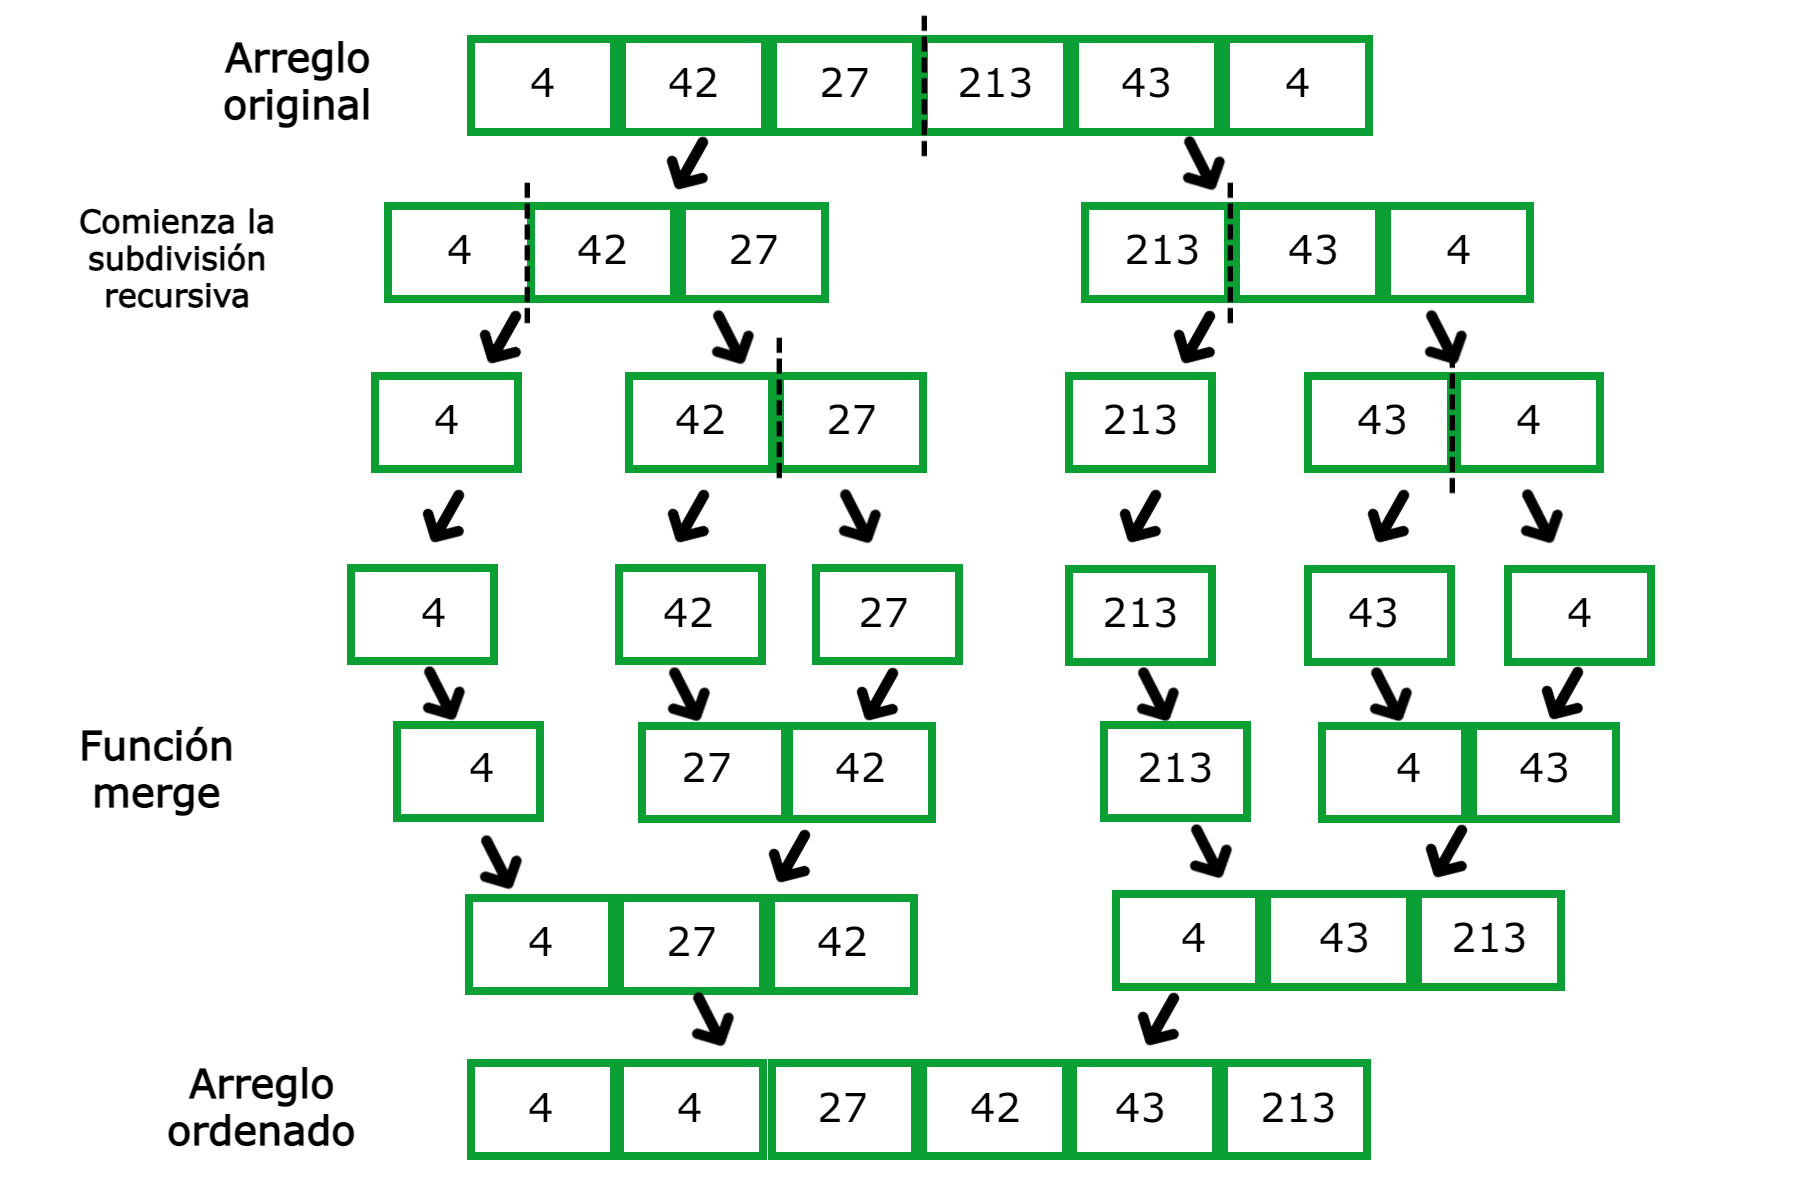

##2.4 Ejecución del algoritmo paso a paso (`verbose = True`)

Al determinar que `verbose` sea igual a `True` tanto en mergeSort como la función merge, la ejecución del algoritmo mostrará su funcionamiento paso a paso de esta forma:

In [3]:
import random

recursiveCalls = 0
originalSize = 0
a = random.sample(range(1,100), 6)
merge_sort(a, verbose = True)

Entrada:  [97, 42, 30, 76, 23, 93] 

Subarreglo izquierdo:  [97, 42, 30]
Subarreglo derecho:  [76, 23, 93]

Por la izquierda, llamada recursiva n° 1
Subarreglo izquierdo:  [97]
Subarreglo derecho:  [42, 30]

Por la izquierda, llamada recursiva n° 2
Se retorna arreglo de un elemento ( [97] )

Por la derecha, llamada recursiva n° 3
Subarreglo izquierdo:  [42]
Subarreglo derecho:  [30]

Por la izquierda, llamada recursiva n° 4
Se retorna arreglo de un elemento ( [42] )

Por la derecha, llamada recursiva n° 5
Se retorna arreglo de un elemento ( [30] )

Comienza el merge

Dato 0 del subarreglo derecho es menor
[30]

Dato restante del subarreglo izquierdo:  42
[30, 42]

Subarreglo ordenado en merge:  [30, 42]

Comienza el merge

Dato 0 del subarreglo derecho es menor
[30]

Dato 1 del subarreglo derecho es menor
[30, 42]

Dato restante del subarreglo izquierdo:  97
[30, 42, 97]

Subarreglo ordenado en merge:  [30, 42, 97]

Por la derecha, llamada recursiva n° 6
Subarreglo izquierdo:  [76]
Sub

#3. Correctitud
##**Teorema 1 (Correctitud de la función Merge)**
*El algoritmo **Merge** genera un arreglo: $[a'_1, a'_2, a'_3,...,a'_n]$, con los mismos elementos de los subarreglos de entrada ordenados de menor a mayor, es decir, $a'_1 \leq a'_2 \leq a'_3 \leq ... \leq a'_n$.*

###Prueba del teorema (función merge)
A base de lo mencionado anteriormente, analizaremos la siguiente **propiedad invariante de bucle**:

> Al comienzo de cada iteración del primer *while*, el subarreglo $a = [p,...,k-1]$ tendrá los $k-p$ elementos más pequeños de los otros arreglos $L = [0,...,n_1+1]$ y $R = [0,...,n_2+1]$, pero ordenados de menor a mayor, donde $p$ y $k$s son el inicio y el final de $a$, y $n_1$, $n_2$ son los largos de $L$ y $R$ respectivamente. Es más, $L[leftPos]$ y $R[rightPos]$ son los elementos más pequeños de sus arreglos que aún no han sido copiados a $a$.

###Inicialización
Previo a la primera iteración, observamos que $k = p = 0$, lo que nos señala que el subarreglo $a$ está vacío y trivialmente ordenado. Además, como no se ha avanzado, $leftPos = rightPos = 0$, tanto $L[leftPos]$ como $R[rightPos]$ son los menores elementos que aún no han sido copiados a $a$.

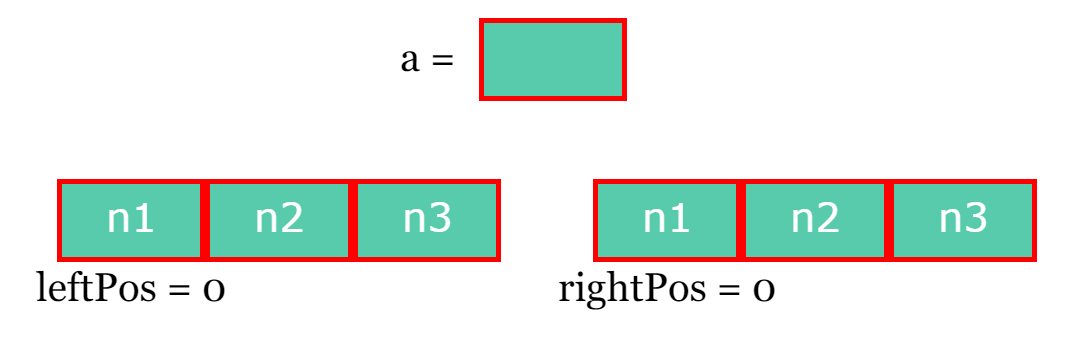

# 4. Tiempo de ejecución

###Teorema (tiempo de ejecución)

El algoritmo **Merge Sort** tiene un tiempo de ejecución de $O(n*logn)$ en el peor caso.



# 5. Experimentos

##5.1 Número de comparaciones

##5.2 Comparación entre Merge Sort e Insertion Sort

A continuación, se evaluará el tiempo de ejecución del algoritmo estudiado en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500. Estos resultados se compararán con aquellos entregados por el algoritmo Insertion Sort.

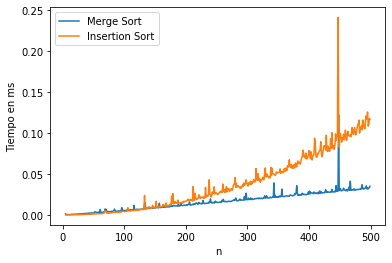

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

def insertion_sort (array):
  for i in range (1, len(array)):
    data = array[i]
    k = i-1
    while k >= 0 and array[k] >= data:
      array[k+1] = array[k]
      k = k-1
    array[k+1] = data

  return array

x1 = []; y1 = []; x2 = []; y2 = []

for n in range(5, 500):
  a = random.sample(range(1,1000), n)
  b = random.sample(range(1,1000), n)

  r = repeat(setup="from __main__ import merge_sort", stmt = f"merge_sort({a})", repeat = 1, number = 10)
  t = repeat(setup="from __main__ import insertion_sort", stmt = f"insertion_sort({a})", repeat = 1, number = 10)

  x1.append(n)
  x2.append(n)
  y1.append(r)
  y2.append(t)

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["Merge Sort", "Insertion Sort"])

plt.xlabel('n')
plt.ylabel("Tiempo en ms")
plt.show()

###Análisis de resultados

Como se puede observar en el gráfico, como era de esperarse **Merge Sort** se ejecuta en menos tiempo a comparación del **Insertion Sort**. Mientras que ésta última presenta un incremento cuadrático a medida que la cantidad de elementos aumenta, al igual como lo indica su complejidad teórica en el caso promedio ($O(n^2)$), mientras que nuestro algoritmo estudiado se mueve por el gráfico de forma lineal, respaldando que su menor complejidad ($O(n*logn)$) sí provoca que se ejecute en menos tiempo.

Cabe destacar que en ciertas partes se observan ciertos *peaks* durante la ejecución de cada algoritmo. Lo más probable es que estos sean causados por irregularidades en el funcionamiento del hardware, y no guarda relación con lo estudiado.